In [ ]:
# Deklarasi library yang akan digunakan
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from math import *
from random import *

In [ ]:
# Global Variabel
global TREE, BURNING
TREE = 1
BURNING = 2

In [ ]:
# Fungsi untuk menginisialisasi kondisi hutan awal
def initForest(n):
    forest = np.full((n, n), TREE)  # Inisialisasi semua sel sebagai pohon
    middle = n // 2
    forest[middle, middle] = BURNING  # Hanya satu pohon yang terbakar di tengah
    return forest

In [ ]:
# Fungsi untuk memvisualisasikan hutan ke dalam bentuk grid menggunakan warna RGB
def makeColorGrid(grid):
    n = grid.shape[0]
    colorGrid = np.zeros((n, n, 3))
    colorGrid[:, :, 0] = 1
    colorGrid[:, :, 1] = 1
    for i in range(0, n):
        for j in range(0, n):
            if (grid[i, j] == TREE):
                colorGrid[i, j, 0] = 0.1
                colorGrid[i, j, 1] = 0.75
                colorGrid[i, j, 2] = 0.02
            if (grid[i, j] == BURNING):
                colorGrid[i, j, 0] = 0.6
                colorGrid[i, j, 1] = 0.2
                colorGrid[i, j, 2] = 0.1
    return colorGrid

In [ ]:
# Fungsi untuk memperluas grid hutan
def reflectingLat(lat):
    latNS = np.row_stack((lat[-1], lat, lat[0]))
    return np.column_stack((latNS[:,-1], latNS, latNS[:,0]))

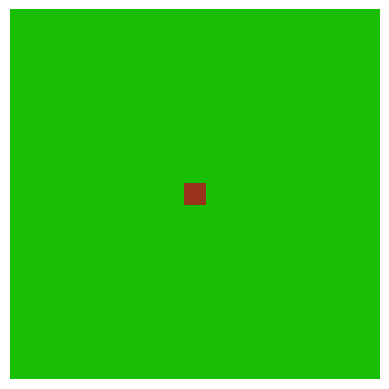

In [ ]:
# Fungsi untuk memvisualisasikan hutan denan matplotlib
fig = plt.figure()
plt.axis('off')
n = 17
im = plt.imshow(makeColorGrid(initForest(n)))

In [ ]:
# Fungsi untuk menyatakan keadaan sel yang mewakili pohon berdasarkan sekitarnya
def spread(site, N, E, S, W, burnProbability):
    newSite = site
    if site == TREE and (N == BURNING or E == BURNING or S == BURNING or W == BURNING):
        if random() < burnProbability:
          newSite = BURNING
        else:
          newSite = TREE
    return newSite

In [ ]:
# Fungsi untuk menerapkan 'rules' penyebaran pembakaran
def applyExtended(latExt, burnProbability):
    n = latExt.shape[0] - 2
    newLat = np.zeros((n, n))

    for i in range(1, n + 1):
        for j in range(1, n + 1):
            site = latExt[i, j]
            N = latExt[i - 1, j]
            E = latExt[i, j + 1]
            S = latExt[i + 1, j]
            W = latExt[i, j - 1]
            newLat[i - 1, j - 1] = spread(site, N, E, S, W, burnProbability)
    return newLat

In [ ]:
# Fungsi untuk mensimulasikan kebakaran hutan
def fire(n, burnProbability, t):
    forest  = initForest(n)

    grids = np.zeros((t + 1, n, n))
    grids[0, :, :] = forest
    for i in range(1, t + 1):
        forestExtended = reflectingLat(forest)
        forest = applyExtended(forestExtended, burnProbability)
        grids[i, :, :] = forest
    return grids[t]

In [ ]:
# Fungsi untuk menghitung persentase pohon yang terbakar di hutan
def percentBurn(grid):
    n = grid.shape[0]
    count = 0
    for i in range(0, n):
      for j in range(0, n):
        if (grid[i][j] == 2):
          count += 1
    percent = count / (n * n)
    print("Presentase hutan yang terbakar: {:.5f}%".format(percent))
    return percent * 100

Presentase hutan yang terbakar: 0.03114%
Presentase hutan yang terbakar: 0.02076%
Presentase hutan yang terbakar: 0.01730%
Presentase hutan yang terbakar: 0.04152%
Presentase hutan yang terbakar: 0.01730%
Presentase hutan yang terbakar: 0.01384%
Presentase hutan yang terbakar: 0.01730%
Presentase hutan yang terbakar: 0.02422%
Presentase hutan yang terbakar: 0.07266%
Presentase hutan yang terbakar: 0.03114%
Presentase hutan yang terbakar: 0.06920%
Presentase hutan yang terbakar: 0.10381%
Presentase hutan yang terbakar: 0.11073%
Presentase hutan yang terbakar: 0.09689%
Presentase hutan yang terbakar: 0.06920%
Presentase hutan yang terbakar: 0.04498%
Presentase hutan yang terbakar: 0.06228%
Presentase hutan yang terbakar: 0.06574%
Presentase hutan yang terbakar: 0.11419%
Presentase hutan yang terbakar: 0.07612%
Presentase hutan yang terbakar: 0.18339%
Presentase hutan yang terbakar: 0.13495%
Presentase hutan yang terbakar: 0.07612%
Presentase hutan yang terbakar: 0.19377%
Presentase hutan

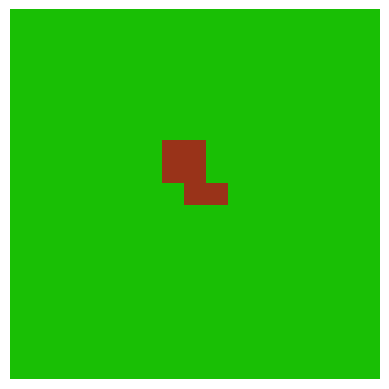

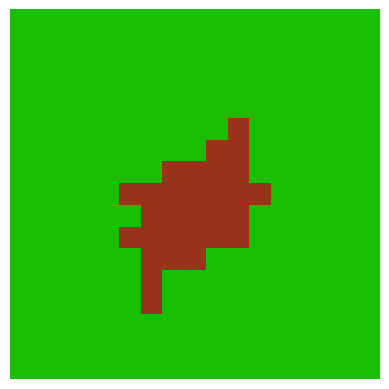

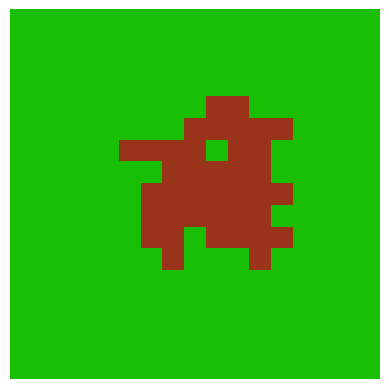

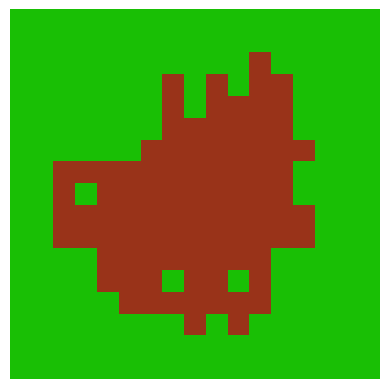

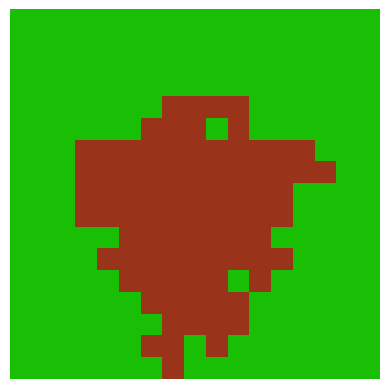

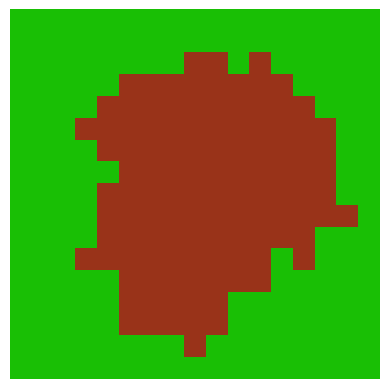

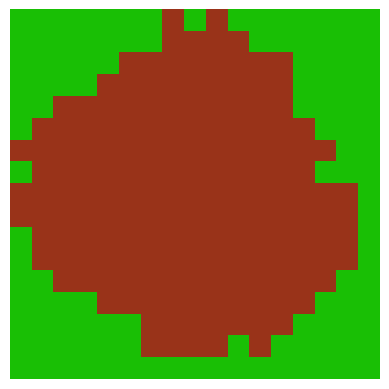

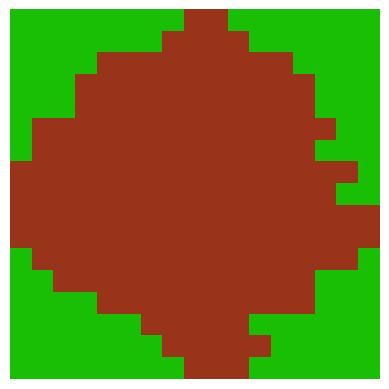

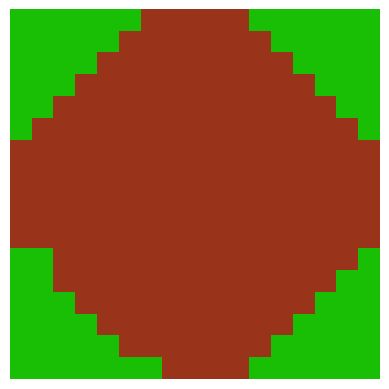

In [ ]:
# Fungsi untuk melakukan beberapa percobaan pembakaran hutan untuk mendapatkan persentase rata-rata pembakaran hutan
def experiment(n):
    average_list = []
    for i in range(1, 10):
      percent_total = 0
      for j in range(n):
        grid = fire(17, i/10, 10)
        if (j == 1):
          fig = plt.figure()
          plt.axis('off')
          im = plt.imshow(makeColorGrid(grid))
        percent_total += percentBurn(grid)
      average_list.append(percent_total / 10)
    return average_list

# Fungsi untuk menampilkan hasil percobaan dengan probabilitas 0,1 hingga 0,9
result = experiment(10)
prob = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]


9
9


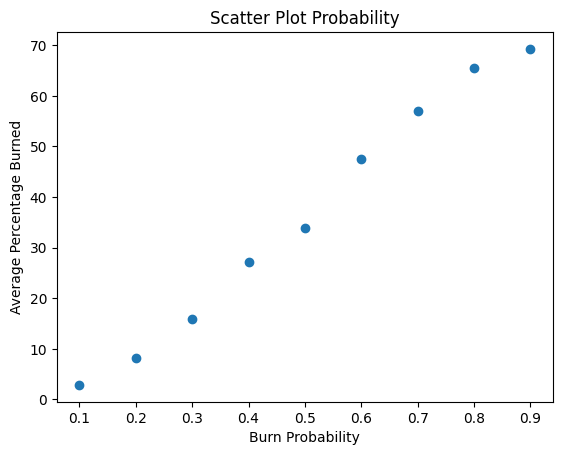

In [ ]:
print(len(prob))  # Untuk memeriksa panjang prob
print(len(result))  # Untuk memeriksa panjang result

# Membuat scatter plot
plt.scatter(prob, result)

# Menambahkan label dan judul
plt.xlabel('Probabilitas Kebakaran')
plt.ylabel('Persentase Rata-rata Terbakar')
plt.title('Scatter Plot Probabilitas')

# Menampilkan plot
plt.show()

In [ ]:
# Menampilkan rata-rata presentase terbakar untuk tiap probabilitas
for prob_value, average_list in zip(prob, result):
    print("Probabilitas: {} - Rata-rata Presentase Terbakar: {:.5f} %".format(prob_value, average_list/100))

Probabilitas: 0.1 - Rata-rata Presentase Terbakar: 0.02872 %
Probabilitas: 0.2 - Rata-rata Presentase Terbakar: 0.08131 %
Probabilitas: 0.3 - Rata-rata Presentase Terbakar: 0.15813 %
Probabilitas: 0.4 - Rata-rata Presentase Terbakar: 0.27232 %
Probabilitas: 0.5 - Rata-rata Presentase Terbakar: 0.33910 %
Probabilitas: 0.6 - Rata-rata Presentase Terbakar: 0.47439 %
Probabilitas: 0.7 - Rata-rata Presentase Terbakar: 0.56955 %
Probabilitas: 0.8 - Rata-rata Presentase Terbakar: 0.65467 %
Probabilitas: 0.9 - Rata-rata Presentase Terbakar: 0.69273 %
